In [ ]:
############
## end of 2/21/2023 update:
## This notebook mostly holds simple tests to get tc years, names, and datasets from NOAA's website!
## each step works independently, but the V2 version of this notebook puts each step together to automatically download 
## datasets.
############

In [95]:
from urllib.request import urlopen
import urllib
import re
import numpy as np

# choose a generic path to fl data with _AC.nc cases. Save the raw output as a string
urlstr = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2019/jerry/'
urlpath =urlopen( urlstr)
string = urlpath.read().decode('utf-8')
#print( string)

# break down the one huge string into a list of strings.
# separate them by the </li> character
# cut the first and last entries off the list -> not filenames!
stringlist = string.split("</li>")
stringlist = stringlist[ 1:-1] # get rid of meaningless header and footer

# define a pattern of files to sort for
# pattern = re.compile('<li><a href=".*_AC.nc">') # include any _AC.nc file (H, I, or N)
pattern = re.compile('<li><a href=".*[HI][12]_AC.nc">.*') # only save H or I files, not N


# save new valid filenames here
files = []
# sort for the intended files and print out valid names!
for i, val in enumerate( stringlist):
   
    # print( stringlist [i])
    
    if re.search( pattern, val):
        match = re.search( pattern, val)
        # print( match)
        name = val[ 14 : 30 ]
        # print( name )
        
        files.append( name)
        
        # checking for duplicate files... might not be necessary!
        '''
        if len( files) == 0:
            files.append( name)
            
        else:
            for filei, fileval in enumerate( files):
                if fileval == name:
                    print("Duplicate File!")
                else:
                    files.append( name)
                    break
        '''


print( files)

['20190919H1_AC.nc', '20190920H1_AC.nc', '20190922H1_AC.nc']


In [96]:
# try saving years and tc names included in noaa's flight level database

# first get year folders
urlrootstr = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/'
urlrootpath =urlopen( urlrootstr)
string = urlrootpath.read().decode('utf-8')

stringlist = string.split("</li>")
stringlist = stringlist[ 1:-1] # get rid of meaningless header and footer

#print( string)
#for i, val in enumerate( stringlist):
#    print( val)

# define a pattern of files to sort for
# examples: /^[a-z]{0,10}$/ , ^[0-9]*$

pattern = re.compile('<li><a href="[0-9]{4}/">') # only look in folders with year numbers

# save new valid filenames here
yearfiles = []
# sort for the intended files and print out valid names!
for i, val in enumerate( stringlist):
       
    if re.search( pattern, val):
        match = re.search( pattern, val)
        name = val [ 14 : 18 ]
        
        yearfiles.append( name)

print( yearfiles)

['1960', '1961', '1962', '1964', '1968', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1988', '1991', '1992', '1994', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [110]:
# get the tc names for each year

# make sure there's an empty list for every year! names will be added for each year
namefiles = []
for i in range( len( yearfiles)):
    namefiles.append( [])

print( namefiles)

######
## do the same thing again: find all the unique names!
# first get year folders

for yeari, yearval in enumerate( yearfiles):

    yearstr = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/' + yearval
    yearpath =urlopen( yearstr)
    string = yearpath.read().decode('utf-8')

    stringlist = string.split("</li>")
    stringlist = stringlist[ 1:-1] # get rid of meaningless header and footer

    #print( string)
    #for i, val in enumerate( stringlist):
    #    print( val)

        
    # define a pattern of files to sort for
    pattern = re.compile('<li><a href="[a-zA-Z]*/">') # only look in folders with year numbers

    # sort for the intended files and print out valid names!
    for i, val in enumerate( stringlist):

        if re.search( pattern, val):
            #match = re.search( pattern, val)

            # trim off name header
            name = val [ 14 : ]            
            # find the first /, signifying the end of the name
            for j in range( len( name)):
                if name[ j] == '/':
                    endval = j
                    break
            # make final trim!        
            name = name [ : endval]
                
            namefiles[ yeari].append( name)

    print( "Year " + yearval + " complete")


[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
Year 1960 complete
Year 1961 complete
Year 1962 complete
Year 1964 complete
Year 1968 complete
Year 1977 complete
Year 1978 complete
Year 1979 complete
Year 1980 complete
Year 1981 complete
Year 1982 complete
Year 1983 complete
Year 1984 complete
Year 1985 complete
Year 1986 complete
Year 1988 complete
Year 1991 complete
Year 1992 complete
Year 1994 complete
Year 1996 complete
Year 1997 complete
Year 1998 complete
Year 1999 complete
Year 2000 complete
Year 2001 complete
Year 2002 complete
Year 2003 complete
Year 2004 complete
Year 2005 complete
Year 2006 complete
Year 2007 complete
Year 2008 complete
Year 2009 complete
Year 2010 complete
Year 2011 complete
Year 2012 complete
Year 2013 complete
Year 2014 complete
Year 2015 complete
Year 2016 complete
Year 2017 complete
Year 2018 complete
Year 2019 complet

In [111]:
# print out the years / names nicely!
for yeari, yearval in enumerate( yearfiles):
    print( "Year: " + yearval)
    print( "Names: " + str( namefiles[ yeari]))

Year: 1960
Names: ['donna']
Year: 1961
Names: ['carla', 'cldphy', 'frances', 'hattie']
Year: 1962
Names: ['daisy', 'stormfury']
Year: 1964
Names: ['dora']
Year: 1968
Names: []
Year: 1977
Names: ['anita', 'heather']
Year: 1978
Names: ['debra', 'ella', 'greta', 'locus']
Year: 1979
Names: ['cldphy', 'david', 'frederic', 'henri', 'kerry', 'rosa', 'td']
Year: 1980
Names: ['allen', 'focus', 'georges', 'jeanne', 'seabreeze']
Year: 1981
Names: ['gert', 'irene', 'katrina']
Year: 1982
Names: ['alberto', 'debby', 'disturbance', 'olivia', 'seabreeze']
Year: 1983
Names: ['alicia', 'barry', 'dean', 'misc', 'raymond', 'tico']
Year: 1984
Names: ['arthur', 'diana', 'isidore', 'josephine', 'norbert']
Year: 1985
Names: ['gloria']
Year: 1986
Names: ['charley', 'earl', 'newton', 'paine']
Year: 1988
Names: ['florence', 'gilbert', 'joan', 'keith']
Year: 1991
Names: ['bob', 'claudette', 'fabian', 'fefa', 'guillermo', 'jimena', 'texmex']
Year: 1992
Names: ['andrew', 'tina']
Year: 1994
Names: ['olivia']
Year: 1

In [58]:
# try downloading the files provided above!
import os

# see if there's already a year folder availible
os.chdir("/Users/etmu9498/research/data/in-situ-noaa-full")

output_folder = '2019'

if not os.path.isdir( output_folder):
    os.makedirs( output_folder)
    print( 'New folder created: ' + output_folder)
else:
    print( 'Existing folder accessed: ' + output_folder)


# go to the new folder
os.chdir("/Users/etmu9498/research/data/in-situ-noaa-full/" + output_folder)

# save the valid datasets!
for i, val in enumerate( files):
    new_x = val
    
    print( val)
    print( type( val))
    print( urlstr)
    print( type( urlstr))
    urllib.request.urlretrieve( urlstr + val, new_x)
    
    print( "file " + str( i) + " downloaded")

Existing folder accessed: 2019
20190919H1_AC.nc
<class 'str'>
https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2019/jerry/
<class 'str'>
20190920H1_AC.nc
<class 'str'>
https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2019/jerry/
<class 'str'>
20190922H1_AC.nc
<class 'str'>
https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2019/jerry/
<class 'str'>


In [61]:
# check downloads
os.chdir("/Users/etmu9498/research/data/in-situ-noaa-full/" + output_folder)

import xarray as xr

data = xr.open_dataset( '20190919H1_AC.nc', decode_times=False)

In [62]:
data

<xarray.Dataset>
Dimensions:              (Time: 17294)
Coordinates:
  * Time                 (Time) int32 0 1 2 3 4 ... 17290 17291 17292 17293
Data variables: (12/568)
    YawRateI.2           (Time) float32 ...
    YawRateI.1           (Time) float32 ...
    YawRateI-GPS.2       (Time) float32 ...
    YawRateI-GPS.1       (Time) float32 ...
    VerrGPS.2            (Time) float32 ...
    VerrGPS.1            (Time) float32 ...
    ...                   ...
    ALTPAft.d            (Time) float32 ...
    AltRa1.c             (Time) float32 ...
    AltRa2.c             (Time) float32 ...
    UDIRX.d              (Time) float32 ...
    UDIRY.d              (Time) float32 ...
    UDIRZ.d              (Time) float32 ...
Attributes:
    StartTime:     1568896896
    FlightDate:    2019-09-19
    TimeInterval:  12:41:36-17:29:50

Total Number of plots to be created: 3


Current year: 2019
Case 0 not included: peak winds < 50 m/s
Dataset 1 loaded
Case 2 not included: peak winds < 50 m/s
Auto variables added
Chosen variables added
Pandas dataframe 1 saved
Variable added: rmw
Variable added: Time
Variable added: wind_speed
Variable added: w
Variable added: Rain Rate
Variable added: Theta E
Variable added: Mixing Ratio
Variable added: temp
Pandas dataframe 2 saved
Confidence intervals found for rmw
Confidence intervals found for Time
Confidence intervals found for wind_speed
Confidence intervals found for w
Confidence intervals found for Rain Rate
Confidence intervals found for Theta E
Confidence intervals found for Mixing Ratio
Confidence intervals found for temp


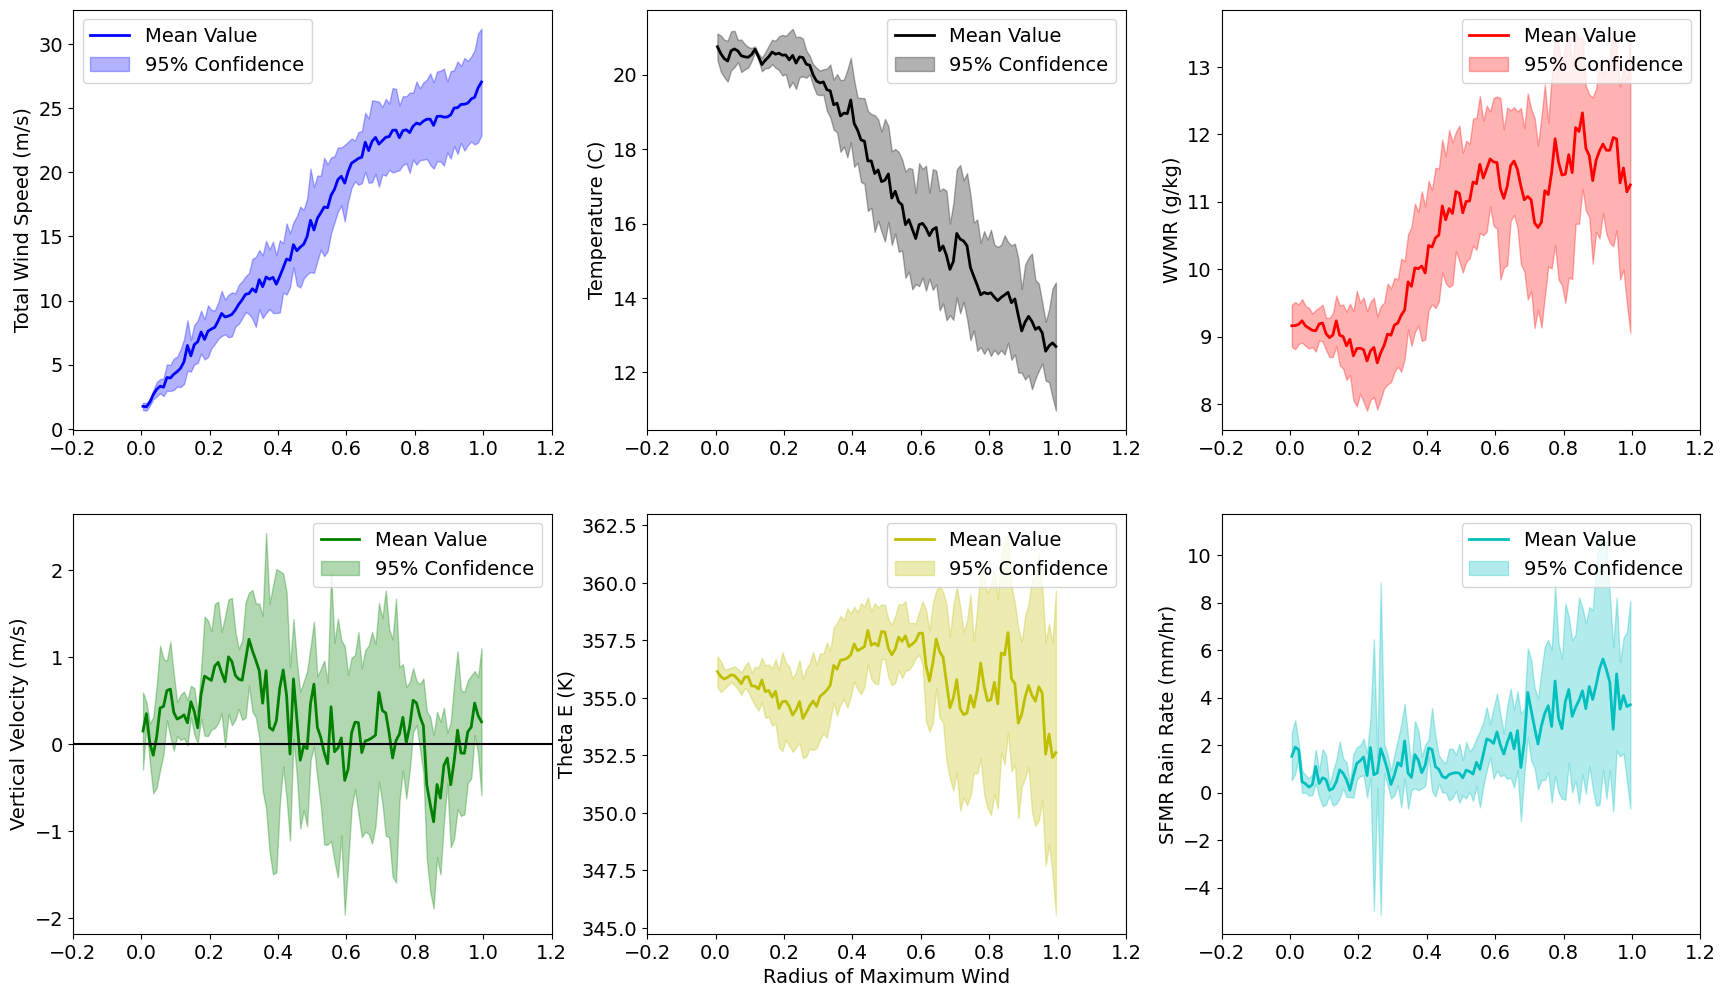

In [65]:
#################
## code taken from "2023-02-01 flight level rmws new nc datasets"
## results: the auto code works really well on the automatically downloaded data!
#################

import os
os.chdir( "/Users/etmu9498/research/code/scripts/plotting")
import auto_flight_level_plots_new_noaa_data as plotter
import fl_mean_plots_error
import fl_mean_fields_binned


#plotter.plot( tc='2019')
#fl_mean_fields_binned.plot_all_eyes( tc='2019', max_v_requirement=40)
#fl_mean_plots_error.make_plot( tc='2019', max_v_requirement=40)
